In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
import pandas as pd
import numpy as np
import csv
import os
from datetime import date, timedelta, datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# calendar plot - combined three

In [ ]:
# https://pythonhosted.org/calmap/
!pip install calmap
import numpy as np; np.random.seed(sum(map(ord, 'calmap')))
import pandas as pd
import calmap

## plot1

In [72]:
subject3 ='.'
subject2 = '.'
subject1 = '.'
record_dir = '/content/drive/MyDrive/Colab Notebooks/SweetGoals/Revision Version/cgm_count_by_day/'

In [1]:
df_summary = pd.read_csv('./CGM_summary.csv')

# for i in df_summary.values:
#   if i[0] == subject1:
#     print('subj1', subject1, i[1])
#   if i[0] == subject2:
#     print('subj2', subject2, i[1])
#   if i[0] == subject3:
#     print('subj3', subject3, i[1])

In [74]:
def events_2022(subj):
  df = pd.read_csv(record_dir + subj + '.csv')
  df['Event'] = [i / 288 if i <= 288 else 1 for i in df.Count.values]
  adh = []
  for i in df['Event'].values:
    if i >= 0.7:
      adh.append(1)
    elif i > 0:
      adh.append(0.5)
    else:
      adh.append(0)
  df['Adherence'] = adh
  df['Date'] = pd.date_range(df.displayTime.values[0].split(' ')[0], periods=df.shape[0], freq='D')
  df = df[df['Date'] < '2023-01-01'][df['Date'] > '2021-12-31']
  # print(df.shape)
  # df.head()
  events = pd.Series(df.Adherence.values, index=df.Date.values)
  return events

In [75]:
events1 = events_2022(subject1)
events2 = events_2022(subject2)
events3 = events_2022(subject3)

<ipython-input-74-043753124d89>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df['Date'] < '2023-01-01'][df['Date'] > '2021-12-31']
<ipython-input-74-043753124d89>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df['Date'] < '2023-01-01'][df['Date'] > '2021-12-31']
<ipython-input-74-043753124d89>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df['Date'] < '2023-01-01'][df['Date'] > '2021-12-31']


In [76]:
from matplotlib import colors
cm_colors = ['#FFD166', "#F78C6B", "#06D6A0"]
cm_labels = ['No \nAdherence', 'Partial \nAdherence', 'High \nAdherence']
cmap = colors.ListedColormap(cm_colors)

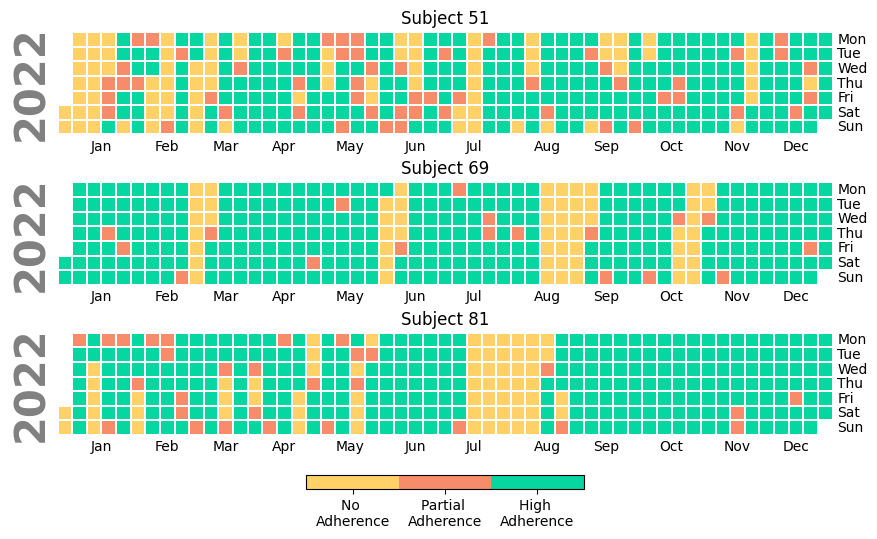

In [77]:
import calmap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# Set up a figure with subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 6))

# Determine data range for consistent color mapping
vmin = 0
vmax = 1

# Plot each year on its own subplot
calmap.yearplot(events1, year=2022, ax=axes[0], cmap=cmap, vmin=vmin, vmax=vmax, linewidth=0.1)
axes[0].set_ylabel('2022', fontsize=30, color='grey', weight='bold')
axes[0].set_title('Subject 51')

calmap.yearplot(events2, year=2022, ax=axes[1], cmap=cmap, vmin=vmin, vmax=vmax, linewidth=0.1)
axes[1].set_ylabel('2022', fontsize=30, color='grey', weight='bold')
axes[1].set_title('Subject 69')

calmap.yearplot(events3, year=2022, ax=axes[2], cmap=cmap, vmin=vmin, vmax=vmax, linewidth=0.1)
axes[2].set_ylabel('2022', fontsize=30, color='grey', weight='bold')
axes[2].set_title('Subject 81')


# Create a ScalarMappable for colorbar
norm = Normalize(vmin=vmin, vmax=vmax)
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Add the colorbar to the figure
cbar = fig.colorbar(sm, ax=axes.ravel().tolist(), orientation='horizontal', pad=0.02, fraction=0.03)
cbar.set_ticks([vmin + (vmin+vmax)/6, (vmin+vmax)/2, vmax - (vmin+vmax)/6])
cbar.set_ticklabels(cm_labels)

# Adjust layout
fig.subplots_adjust(bottom=0.2, hspace=0.4)  # Make room for titles and colorbar

plt.savefig("./figs/combined_calendar_2022_1.png", bbox_inches='tight')
plt.savefig('./final_figures/supplementary/calendar_2022_1.png',bbox_inches='tight')
plt.savefig('./final_figures/supplementary/calendar_2022_1.pdf',bbox_inches='tight')
# Show the plot
plt.show()

## plot2

In [65]:
subject3 ='.'
subject2 = '.'
subject1 = '.'
record_dir = './cgm_count_by_day/'

In [2]:
df_summary = pd.read_csv('./CGM_summary.csv')

for i in df_summary.values:
  if i[3].split('-')[0] == '2023' and i[2].split('-')[0] < '2022':
    print(i[0])

In [4]:
df_summary = pd.read_csv('./CGM_summary.csv')

# for i in df_summary.values:
#   if i[0] == subject1:
#     print('subj1', subject1, i[1])
#   if i[0] == subject2:
#     print('subj2', subject2, i[1])
#   if i[0] == subject3:
#     print('subj3', subject3, i[1])

In [68]:
def events_2022(subj):
  df = pd.read_csv(record_dir + subj + '.csv')
  df['Event'] = [i / 288 if i <= 288 else 1 for i in df.Count.values]
  adh = []
  for i in df['Event'].values:
    if i >= 0.7:
      adh.append(1)
    elif i > 0:
      adh.append(0.5)
    else:
      adh.append(0)
  df['Adherence'] = adh
  df['Date'] = pd.date_range(df.displayTime.values[0].split(' ')[0], periods=df.shape[0], freq='D')
  df = df[df['Date'] < '2023-01-01'][df['Date'] > '2021-12-31']
  # print(df.shape)
  # df.head()
  events = pd.Series(df.Adherence.values, index=df.Date.values)
  return events

In [69]:
events1 = events_2022(subject1)
events2 = events_2022(subject2)
events3 = events_2022(subject3)

<ipython-input-68-043753124d89>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df['Date'] < '2023-01-01'][df['Date'] > '2021-12-31']
<ipython-input-68-043753124d89>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df['Date'] < '2023-01-01'][df['Date'] > '2021-12-31']
<ipython-input-68-043753124d89>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df['Date'] < '2023-01-01'][df['Date'] > '2021-12-31']


In [70]:
from matplotlib import colors
cm_colors = ['#FFD166', "#F78C6B", "#06D6A0"]
cm_labels = ['No \nAdherence', 'Partial \nAdherence', 'High \nAdherence']
cmap = colors.ListedColormap(cm_colors)

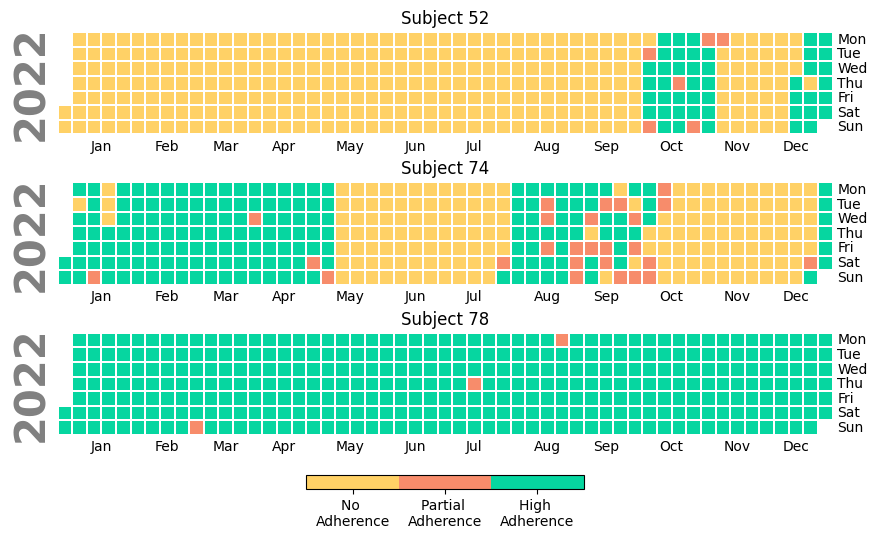

In [71]:
import calmap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# Set up a figure with subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 6))

# Determine data range for consistent color mapping
vmin = 0
vmax = 1

# Plot each year on its own subplot
calmap.yearplot(events1, year=2022, ax=axes[0], cmap=cmap, vmin=vmin, vmax=vmax, linewidth=0.1)
axes[0].set_ylabel('2022', fontsize=30, color='grey', weight='bold')
axes[0].set_title('Subject 52')

calmap.yearplot(events2, year=2022, ax=axes[1], cmap=cmap, vmin=vmin, vmax=vmax, linewidth=0.1)
axes[1].set_ylabel('2022', fontsize=30, color='grey', weight='bold')
axes[1].set_title('Subject 74')

calmap.yearplot(events3, year=2022, ax=axes[2], cmap=cmap, vmin=vmin, vmax=vmax, linewidth=0.1)
axes[2].set_ylabel('2022', fontsize=30, color='grey', weight='bold')
axes[2].set_title('Subject 78')


# Create a ScalarMappable for colorbar
norm = Normalize(vmin=vmin, vmax=vmax)
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Add the colorbar to the figure
cbar = fig.colorbar(sm, ax=axes.ravel().tolist(), orientation='horizontal', pad=0.02, fraction=0.03)
cbar.set_ticks([vmin + (vmin+vmax)/6, (vmin+vmax)/2, vmax - (vmin+vmax)/6])
cbar.set_ticklabels(cm_labels)

# Adjust layout
fig.subplots_adjust(bottom=0.2, hspace=0.4)  # Make room for titles and colorbar

plt.savefig("./figs/combined_calendar_2022_2.png", bbox_inches='tight')
plt.savefig('./final_figures/supplementary/calendar_2022_2.png',bbox_inches='tight')
plt.savefig('./final_figures/supplementary/calendar_2022_2.pdf',bbox_inches='tight')
# Show the plot
plt.show()